


**Project 4 - Part 3 (Core)**

<a href="https://colab.research.google.com/github/othinAbbey/Project-4/blob/main/Onyango_Abbey_Project_4_Part_2_(Core)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning

In [4]:
# Create a copy of the original DataFrame
#df_copy = df.copy()

## Check for Missing values

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Check for data types

In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Inspect individual colums for unique values

In [7]:
# Print unique values in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'age': [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Unique values in column 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in column 'fnlwgt': [226802  89814 336951 ... 129912 255835 257302]
Unique values in column 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in column 'educational-num': [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Unique values in column 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in column 'occupation': ['Machi

In [8]:
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [9]:

# Define the number of bins for age
num_bins = 5
# Create the bins
df['Binned_age'] = pd.cut(df['age'], bins=num_bins)
# the output is now categorical and lets label eoncode it
label_encoder = LabelEncoder()
df['Encoded_Binned_age'] = label_encoder.fit_transform(df['Binned_age'])

# Dropping the oridinal column
# Drop the original age column
df.drop('age', axis=1, inplace=True)
df.drop('Binned_age', axis=1, inplace=True)

In [10]:
df.dtypes

workclass             object
fnlwgt                 int64
education             object
educational-num        int64
marital-status        object
occupation            object
relationship          object
race                  object
gender                object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
income                object
Encoded_Binned_age     int64
dtype: object

In [11]:
# Encording the Workclass column
df['workclass'].isnull().sum()
# Apply Label Encoding
label_encoder = LabelEncoder()
df['workclass_encoded'] = label_encoder.fit_transform(df['workclass'])
df.drop('workclass', axis=1, inplace=True)

In [12]:
df['workclass_encoded'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

In [13]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [14]:
# Encoding the Education column
# Apply Label Encoding
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df.drop('education',axis=1, inplace=True)

In [15]:
df['education_encoded'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12, 10,  4,  8,  6,  2,  3, 13])

In [16]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=['marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
df['income'] = label_encoder.fit_transform(df['income'])

# Data Exploration and Visulisation

## Bar plot of age distribution

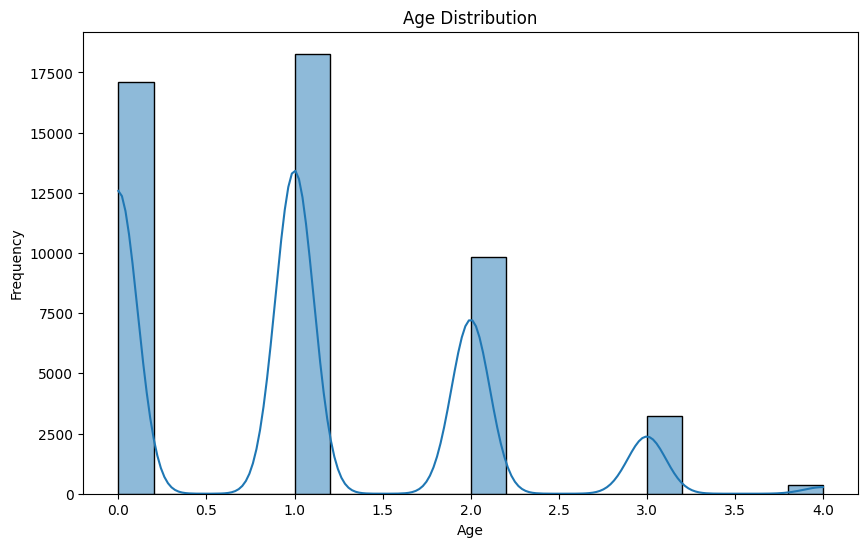

In [18]:
# Bar plot of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Encoded_Binned_age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

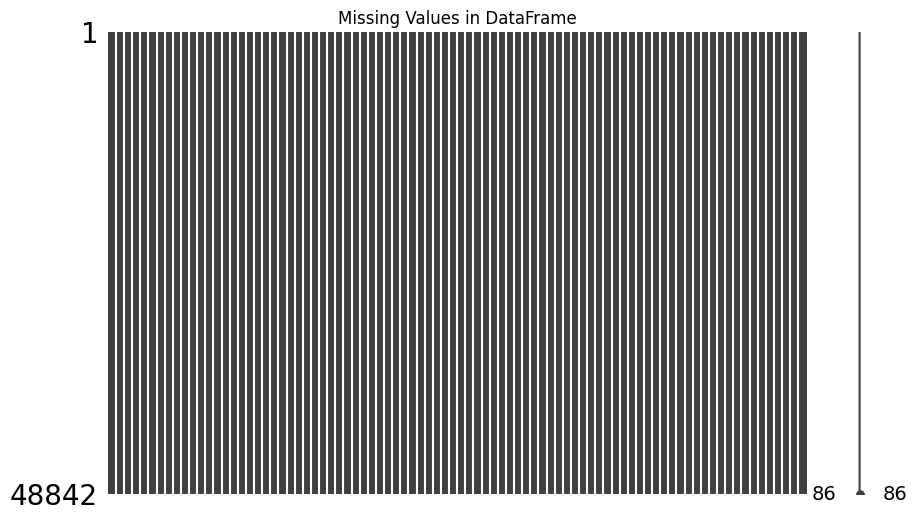

In [19]:
msno.matrix(df, figsize=(10, 6))
plt.title('Missing Values in DataFrame')
plt.show()

## Bar plot of education level

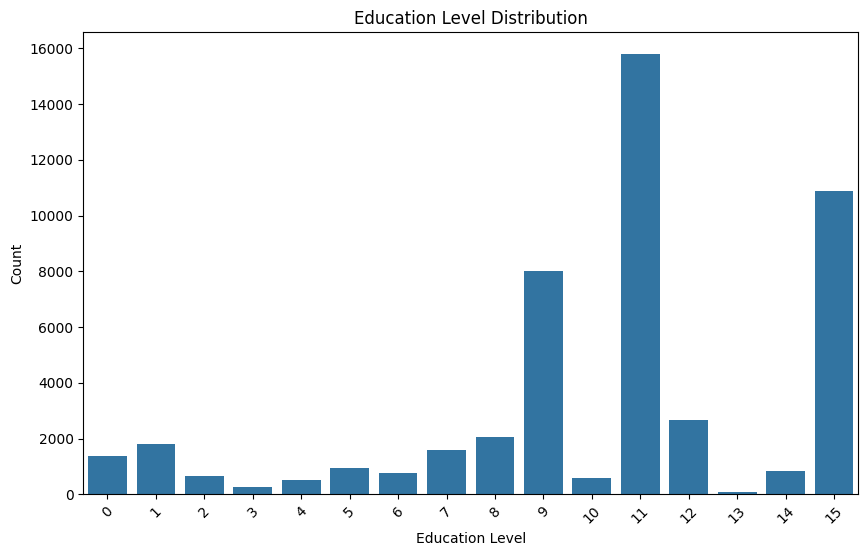

In [20]:
# Bar plot of education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education_encoded', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Splitting the data

In [21]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Imputing the missing values

In [22]:
# Impute missing values in training set
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a suitable imputation strategy
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_scaled), columns=X_train.columns)

In [23]:
# Impute missing values in testing set (using the same imputer)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_scaled), columns=X_test.columns)

In [24]:
# Check if any missing values remain
print("Missing values in X_train_imputed:", X_train_imputed.isnull().sum().sum())
print("Missing values in X_test_imputed:", X_test_imputed.isnull().sum().sum())

Missing values in X_train_imputed: 0
Missing values in X_test_imputed: 0


# Fit and Evaluate the model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def classification_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    if verbose:
        # Print Result with Label and Header
        header = "-" * 60
        print(header, f"Classification Metrics: {label}", header, sep='\n')
        print(f"- Accuracy = {accuracy:,.3f}")
        print(f"- Precision = {precision:,.3f}")
        print(f"- Recall = {recall:,.3f}")
        print(f"- F1-score = {f1:,.3f}")
        print("Confusion Matrix:")
        print(cm)
    if output_dict:
        metrics = {'Label': label, 'Accuracy': accuracy,
                   'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm}
        return metrics

def evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = clf.predict(X_train)

    # Call the helper function to obtain classification metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, verbose=verbose,
                                            output_dict=output_frame,
                                            label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = clf.predict(X_test)
    # Call the helper function to obtain classification metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, verbose=verbose,
                                           output_dict=output_frame,
                                           label='Test Data')

    # Store results in a dataframe if output_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)


**Fit and evaluate a model using your new features and compare it to your model from Part 1.**

Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

    Fit and evaluate a final model using the selected features. Compare it with previous models

In [26]:
# Initialize and train your classification model (for example, RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Evaluate the classification model
results = evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=True)
print(results)

------------------------------------------------------------
Classification Metrics: Training Data
------------------------------------------------------------
- Accuracy = 0.461
- Precision = 0.305
- Recall = 0.973
- F1-score = 0.465
Confusion Matrix:
[[ 8866 20810]
 [  257  9140]]

------------------------------------------------------------
Classification Metrics: Test Data
------------------------------------------------------------
- Accuracy = 0.460
- Precision = 0.299
- Recall = 0.971
- F1-score = 0.457
Confusion Matrix:
[[2271 5208]
 [  67 2223]]
               Accuracy  Precision  Recall  F1-score  \
Training Data     0.461      0.305   0.973     0.465   
Test Data         0.460      0.299   0.971     0.457   

                           Confusion Matrix  
Training Data  [[8866, 20810], [257, 9140]]  
Test Data        [[2271, 5208], [67, 2223]]  


Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

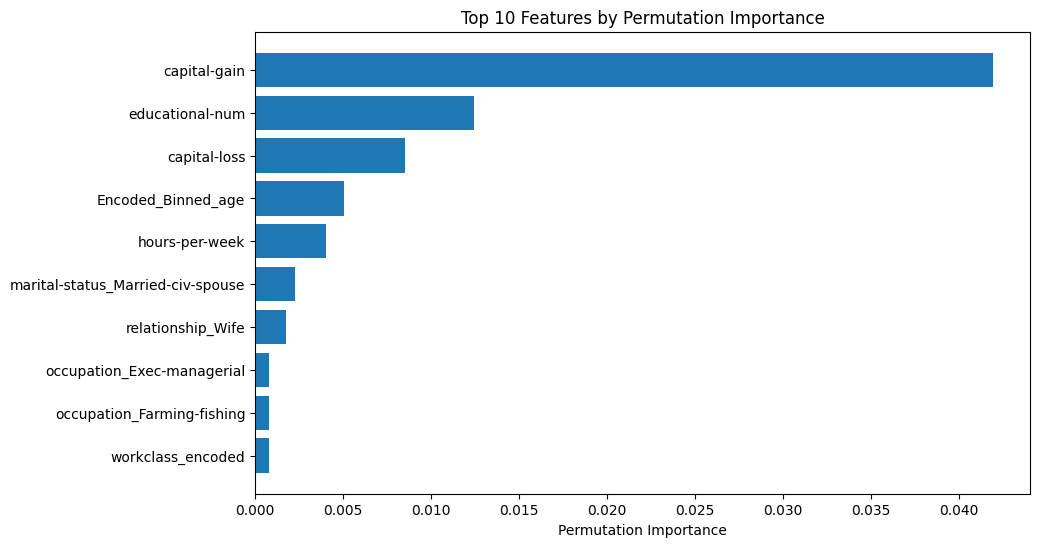

In [27]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit your model (replace RandomForestClassifier with your trained model)
clf.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importances and names
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# Explanatory Visualizations for the most important features.

## Bar plot for average capital gain and education num by income

<ipython-input-28-a1db3832d68b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
<ipython-input-28-a1db3832d68b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')


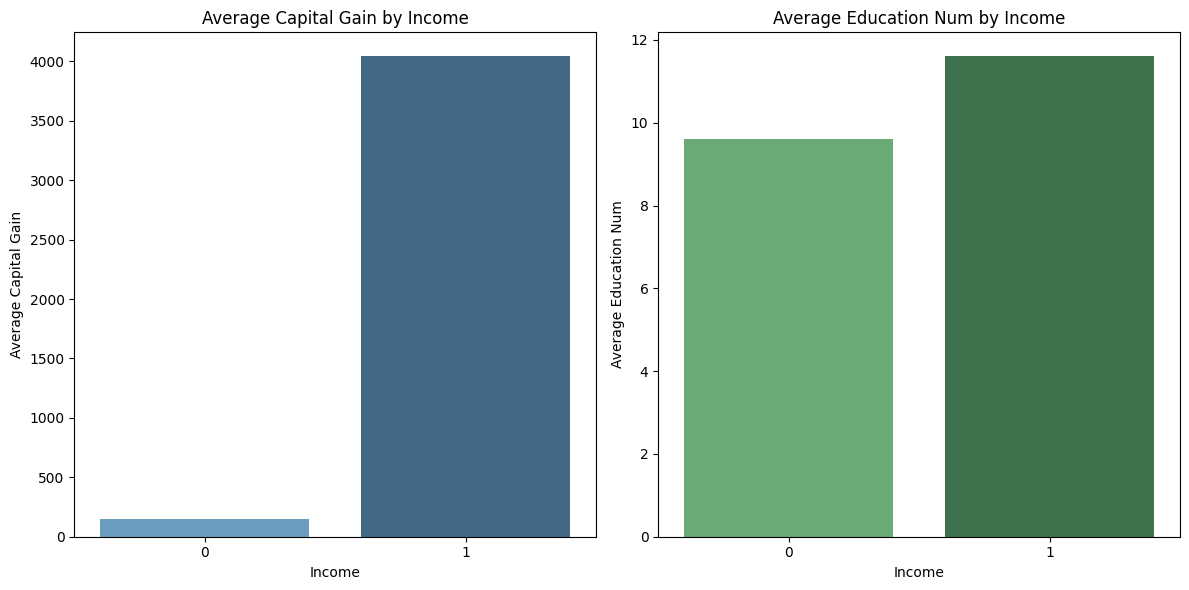

In [28]:
# Bar plot for average capital gain and education num by income
avg_data = df.groupby('income').agg({'capital-gain': 'mean', 'educational-num': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
plt.title('Average Capital Gain by Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')

plt.subplot(1, 2, 2)
sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')
plt.title('Average Education Num by Income')
plt.xlabel('Income')
plt.ylabel('Average Education Num')

plt.tight_layout()
plt.show()


**Project 4 - Part 2 (Core):**
> Add blockquote



Task:
**bold text**
    Choose at least one feature engineering method to apply to the data and compare the models’  performance with and without engineering.
        Some options include:
            Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).
            ​Remember to only fit the PCA on the training data and use pca.transform(X_test) to get the PCs for the testing data.
            Apply clustering, select the appropriate number of clusters, and use the clustering object to get predicted cluster labels for the training and test data. Concatenate/combine these clusters with the original features.
            Remember to only fit KMeans on the training data and use kmeans.predict(X_test) to create cluster labels for the test data.
            Create additional features by applying the feature engineering techniques demonstrated in the LP.
        Fit and evaluate a model using your new features and compare it to your model from Part 1.

Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

    Fit and evaluate a final model using the selected features. Compare it with previous models

Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).
In a Markdown cell, comment on how these features compare to the model from Part 1. Are there any new features in the top 10?

In [29]:
#imports
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

In [30]:
# Apply PCA to get 3 principal components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit PCA on training data
pca = PCA(n_components=3)
pca.fit(X_train_imputed)

# Transform training and testing data
X_train_pca = pca.transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Concatenate principal components with original features
X_train_combined = np.concatenate((X_train, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test, X_test_pca), axis=1)


Apply clustering, select the appropriate number of clusters, and use the clustering object to get predicted cluster labels for the training and test data. Concatenate/combine these clusters with the original features.

In [31]:
from sklearn.cluster import KMeans
import pandas as pd
# Define the number of clusters (you may need to adjust this)
num_clusters = 3

# Fit KMeans only on the training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_combined)


# Get cluster labels for training and test data
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test_combined)

# Convert cluster labels to one-hot encoding
train_cluster_labels_onehot = pd.get_dummies(train_cluster_labels, prefix='cluster')
test_cluster_labels_onehot = pd.get_dummies(test_cluster_labels, prefix='cluster')

# Concatenate cluster labels with original features
X_train_clustered = pd.concat([X_train, train_cluster_labels_onehot], axis=1)
X_test_clustered = pd.concat([X_test, test_cluster_labels_onehot], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
X_train_clustered.isnull().sum()

fnlwgt                       7801
educational-num              7801
capital-gain                 7801
capital-loss                 7801
hours-per-week               7801
                             ... 
native-country_Vietnam       7801
native-country_Yugoslavia    7801
cluster_0                    7801
cluster_1                    7801
cluster_2                    7801
Length: 88, dtype: int64

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_clustered = imputer.fit_transform(X_train_clustered)
X_test_clustered = imputer.fit_transform(X_train_clustered)

In [34]:
X_train_clustered.isnull().sum()

fnlwgt                       0
educational-num              0
capital-gain                 0
capital-loss                 0
hours-per-week               0
                            ..
native-country_Vietnam       0
native-country_Yugoslavia    0
cluster_0                    0
cluster_1                    0
cluster_2                    0
Length: 88, dtype: int64

In [35]:
# Fit and evaluate a model using the new features
# Train Random Forest model
rf_model_with_pca = RandomForestClassifier(random_state=42)
rf_model_with_pca.fit(X_train_combined, y_train)

# Make predictions
y_pred_with_pca = rf_model_with_pca.predict(X_test_combined)

# Evaluate model performance
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)


In [36]:
# Apply feature selection to the new features
from sklearn.feature_selection import SelectFromModel

# Create feature selector using Random Forest
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))

# Fit feature selector on combined data
feature_selector.fit(X_train_combined, y_train)

# Transform data
X_train_selected = feature_selector.transform(X_train_combined)
X_test_selected = feature_selector.transform(X_test_combined)


In [37]:
# Fit and evaluate a final model using the selected features
# Train Random Forest model with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate model performance
accuracy_selected_features = accuracy_score(y_test, y_pred_selected)


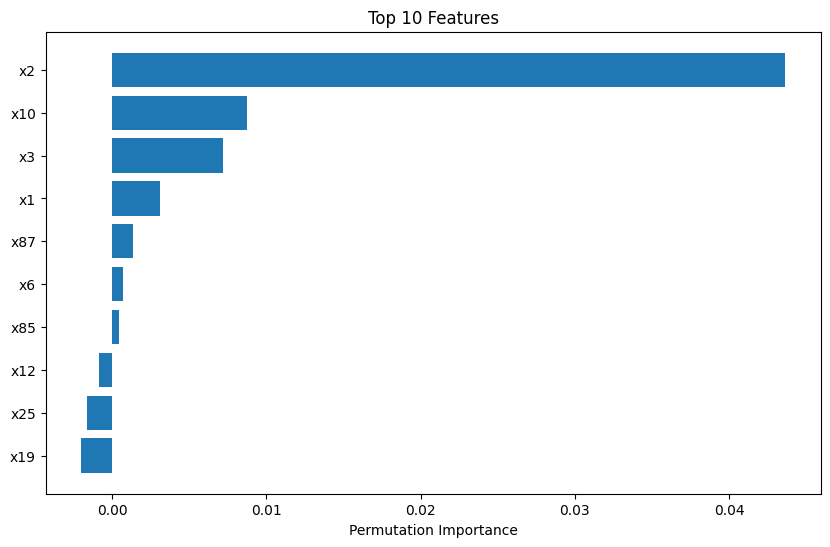

In [38]:
# Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# Calculate permutation importance
result = permutation_importance(rf_model_selected, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]
# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), X_test_selected.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()


In [39]:
# Train Random Forest model with selected features
rf_model_selected_features = RandomForestClassifier(random_state=42)
rf_model_selected_features.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected_features = rf_model_selected_features.predict(X_test_selected)

# Evaluate model performance
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)

print("Accuracy with selected features:", accuracy_selected_features)


Accuracy with selected features: 0.8503429214863343


Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).


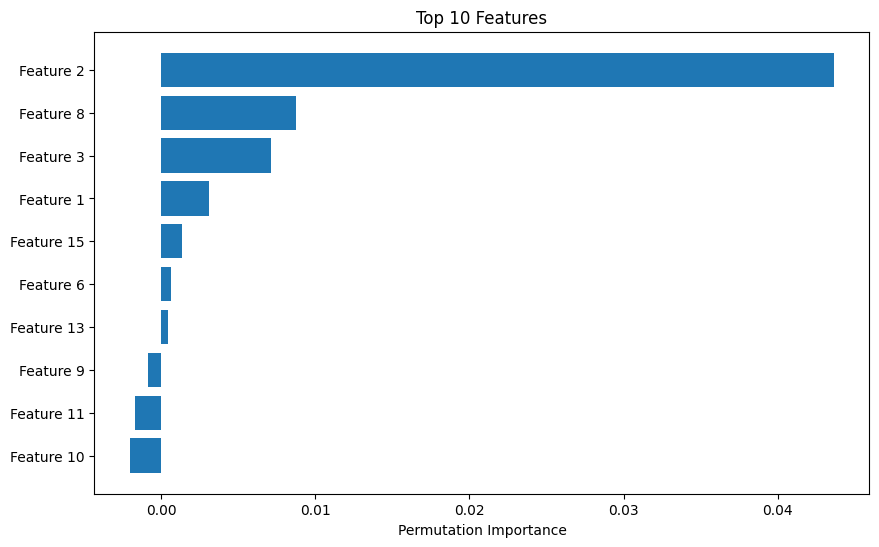

In [40]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(rf_model_selected_features, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()


In [42]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Define the model
model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [43]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import HyperParameters

# Define the model
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32, 32)))

    # Add dropout layer with tunable rate
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(keras.layers.Dropout(rate=hp_dropout_rate))

    # Add dense layer with tunable units and activation
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))

    # Add final softmax layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Tune the optimizer and learning rate
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=hp_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the model with Keras Tuner
tuner = Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models()[0]

# Evaluate the best model on unseen test data
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

ModuleNotFoundError: No module named 'kerastuner'